In [1]:
import ultralytics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
import glob
from ultralytics import YOLO
import os

In [2]:
os.environ['MKL_THREADING_LAYER'] = 'GNU'

#### Fine-Tuning YOLO V11

In [ ]:
model = 'yolo11s.pt'
data = '/work/creative_self_motivated/configs/child_painting.yaml'
epochs = 20
patience = 5
batch = 64
imgsz = 1280
save=True
device=[0,1,2,3] # gpu 0, 1, 2, 3
workers = 4
project = '/work/creative_self_motivated/runs/child_painting'
name = 'run2'
pretrained=True
optimizer='AdamW'
multi_scale=True
cos_lr=True
close_mosaic = 0
amp=True
lr0 = 0.01
lrf = 0.01
plots=True
val=True

yolo_v11 = YOLO('yolo11s.pt')
results = yolo_v11.train(model=model, data=data, epochs=epochs, patience=patience, batch=batch, imgsz=imgsz,
                        save=save, device=device, workers=workers, project=project, name=name,
                        pretrained=pretrained, optimizer=optimizer, multi_scale=multi_scale, cos_lr=cos_lr,
                        close_mosaic=close_mosaic, amp=amp, lr0=lr0, lrf=lrf, plots=plots, val=val)

#### Inference YOLO

In [3]:
trained_yolo = YOLO('/work/creative_self_motivated/runs/child_painting/run1/weights/best.pt')


image 1/1 /work/creative_self_motivated/dataset/child_painting/images/valid/000001.jpg: 1280x1280 1 가지, 1 구름, 1 그네, 1 기둥, 3 꽃s, 1 나무전체, 2 나뭇잎s, 1 다람쥐, 1 달, 1 별, 1 뿌리, 1 새, 1 수관, 3 열매s, 15.0ms
Speed: 11.9ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


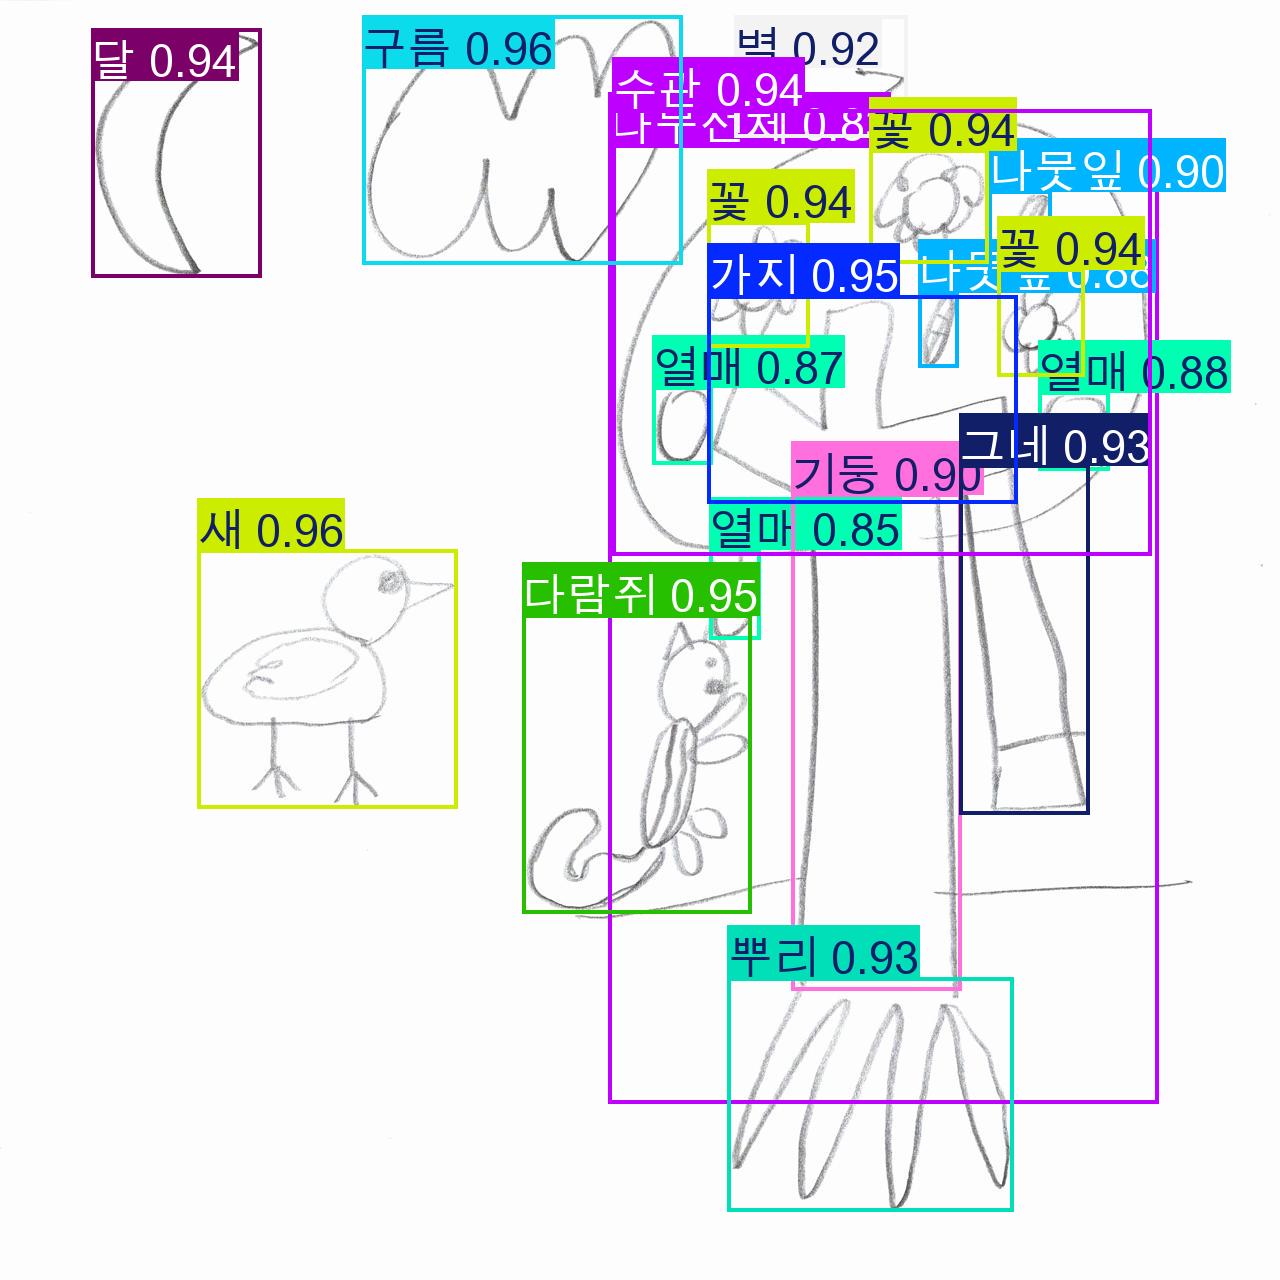

In [8]:
val_img = '/work/creative_self_motivated/dataset/child_painting/images/valid/000001.jpg'
# results = trained_yolo.predict(source=val_img, imgsz=1280, conf=0.25, iou=0.45, show=True, save=True)
results = trained_yolo(val_img)
for result in results:
    result.show()